In [ ]:
# Esta celda actúa sobre la libreta, y permite que se aproveche mejor el espacio.
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%}</style>"))
import sys
print(sys.executable) 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
from sklearn import preprocessing

from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El codigo Python de este cuaderno está oculto para facilitar la lectura.
Para mostrar/ocultar el código, haz click <a href="javascript:code_toggle()">aquí.</a>.''')

# Load results

In [2]:
import pandas as pd
df_alg=pd.read_csv('output/metrics0709/merged_output_genetic.txt')
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Selection Scheme': "string",
                'Selection Candidates': "int64",
                'Crossover Scheme': "string",
                'Crossover Probability': "float64",
                'Mutation Scheme': "string",
                'Mutation Probability': "float64",
                'Replacement Scheme': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
df_alg = df_alg.astype(convert_dict) 
df_alg.loc[(df_alg.Dataset == 'dataset1'),'Dataset']='1'
df_alg.loc[(df_alg.Dataset == 'dataset2'),'Dataset']='2'
display(df_alg.head(2))

df_alg2=pd.read_csv('output/metrics0709/merged_output_grasp.txt',header=0)

convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Iterations': "float64",
                'Solutions per Iteration': "int64",
                'Initialization Type': "string",
                'Local Search Type': "string",
                'Path Relinking': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "int64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
df_alg2 = df_alg2.astype(convert_dict)
#display(df_alg2.head(200))

df_alg = df_alg.append(df_alg2)
display(df_alg.head(200))

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing,NumGenerations
0,1,NSGAIIAlgorithm,100,100,tournament,2,onepoint,0.6,flip1bit,1.0,elitism,181.343956,0.522942,0.64357,26,1.0,0.962828,56.0,0.376207,100
1,1,NSGAIIAlgorithm,100,100,tournament,2,onepoint,0.6,flip1bit,1.0,elitism,180.633699,0.517103,0.64357,10,1.0,0.963449,56.0,0.385255,100


,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,...,HV,Spread,NumSolutions,Spacing,NumGenerations,Iterations,Solutions per Iteration,Initialization Type,Local Search Type,Path Relinking
0,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,1.000000,0.962828,56.0,0.376207,100,NaN,NaN,<NA>,<NA>,<NA>
1,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,1.000000,0.963449,56.0,0.385255,100,NaN,NaN,<NA>,<NA>,<NA>
2,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,1.000000,0.963449,56.0,0.385255,100,NaN,NaN,<NA>,<NA>,<NA>
3,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,1.000000,0.962828,56.0,0.376207,100,NaN,NaN,<NA>,<NA>,<NA>
4,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,1.000000,0.963450,55.0,0.385270,100,NaN,NaN,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,GeneticNDSAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.8,flip1bit,1.0,...,0.436097,0.614566,30.0,0.350220,100,NaN,NaN,<NA>,<NA>,<NA>
196,1,GeneticNDSAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.8,flip1bit,1.0,...,0.710632,0.632193,29.0,0.352717,100,NaN,NaN,<NA>,<NA>,<NA>
197,1,GeneticNDSAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.8,flip1bit,1.0,...,0.693107,0.541776,26.0,0.346804,100,NaN,NaN,<NA>,<NA>,<NA>
198,1,GeneticNDSAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.8,flip1bit,1.0,...,0.435936,0.765997,25.0,0.290656,100,NaN,NaN,<NA>,<NA>,<NA>


In [ ]:
display(df_alg[(df_alg["Algorithm"]=="GeneticNDSAlgorithm")])

In [ ]:
def findData(algorithm,type_alg):
    #print(type_alg)
    if type_alg=="genetic":
        df_a = df_alg[(df_alg["Algorithm"]=="NSGAIIAlgorithm")&(df_alg["Dataset"]==algorithm.dataset_name)&(df_alg["Population Length"]==algorithm.population_length)
                     &(df_alg["Generations"]==algorithm.max_generations)&(df_alg["Selection Scheme"]==algorithm.selection_scheme)
                     &(df_alg["Selection Candidates"]==algorithm.selection_candidates)&(df_alg["Crossover Scheme"]==algorithm.crossover_scheme)
                     &(df_alg["Crossover Probability"]==algorithm.crossover_prob)&(df_alg["Mutation Scheme"]==algorithm.mutation_scheme)
                     &(df_alg["Mutation Probability"]==algorithm.mutation_prob)&(df_alg["Replacement Scheme"]==algorithm.replacement_scheme)]
    elif type_alg=="grasp":
        df_a = df_alg[(df_alg["Algorithm"]=="GRASP")&(df_alg["Dataset"]==algorithm.dataset_name)&(df_alg["Iterations"]==algorithm.iterations)
                     &(df_alg["Solutions per Iteration"]==algorithm.solutions_per_iteration)&(df_alg["Initialization Type"]==algorithm.init_type)
                     &(df_alg["Local Search Type"]==algorithm.local_search_type)&(df_alg["Path Relinking"]==algorithm.path_relinking_mode)]
    #display(df_a['Time(s)'])
    df_a=(
        df_a[['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue",
              #"BestGeneration",
              "NumSolutions","Spacing"]]\
        .mean()
        #.reset_index()\
        #.sort_values("mean_avgvalue",ascending=False)
    )
    return df_a

In [ ]:
display(df_alg[(df_alg["Algorithm"]=="GRASP")&(df_alg["Dataset"]=="1")&(df_alg["Iterations"]==500)
                     &(df_alg["Solutions per Iteration"]==200)&(df_alg["Initialization Type"]=="stochastically")
                     &(df_alg["Local Search Type"]=="None")&(df_alg["Path Relinking"]=="after_local")])

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm

sizes=[50,45,40,35,30,25]
dataset="s3"
seed=10
generations=300
solutions_per_iteration=500
population_length=200
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="None",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="None",
          path_relinking_mode="after_local"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
          path_relinking_mode="after_local"),
    NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=generations,crossover_prob=0.8,
						   crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
]

#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle("Dataset "+dataset)
#ax1.plot(x, y)
#ax2.plot(x, -y)

labels=[]
data_bar=[]
for i in range(len(algorithms)):   
    #print(algorithms[i].get_name())
    if "GRASP" in algorithms[i].file:
        pareto_file = "../output/output/pareto-grasp-"+algorithms[i].file
        metrics_file = "../output/metrics2307/pareto-grasp-"+algorithms[i].file
        df = findData(algorithms[i],"grasp")
        #display(df)
    else:
        pareto_file = "../output/output/pareto-genetic-"+algorithms[i].file
        metrics_file = "../output/metrics2307/pareto-genetic-"+algorithms[i].file
        df = findData(algorithms[i],"genetic")
        #display(df)
    data = np.loadtxt(pareto_file,delimiter=',', dtype=float)
    x,y=data.T
    #ax1.scatter(x,y,label=algorithms[i].get_name(),s=sizes[i])
    plt.scatter(x,y,label=algorithms[i].get_name(),s=sizes[i])
    labels.append(algorithms[i].get_name())
    #display(df["Time(s)"])
    data_bar.append(df["Time(s)"])
#ax2.bar(["labels","a"],[4,2],width=0.2)
#print(labels)
#print(data_bar)
#bar_ax=ax2.bar(labels,data_bar,width=0.2)
#ax2.bar_label(bar_ax, label_type='center')
#for i, v in enumerate(data_bar):
#    plt.text(labels[i], v, str(v))

#plt.set(xlabel='Coste', ylabel='Satisfacción')
#plt.set(xlabel='Algoritmo', ylabel='Tiempo(s)')
plt.xlabel('Coste', fontsize=12)
plt.ylabel('Satisfacción', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True)
plt.rcParams['figure.figsize'] = [26, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm


fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle("Dataset "+dataset)
#ax1.plot(x, y)
#ax2.plot(x, -y)


datasets=["1","2","s1","s2","s3"]
algorithms_data=[]
for dataset in datasets:
    labels=[]
    data_bar=[]
    sizes=[50,45,40,35,30,25]
    #dataset="2"
    seed=10
    generations=300
    solutions_per_iteration=500
    population_length=200
    algorithms = [
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="uniform",local_search_type="None",
              path_relinking_mode="None"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="None",
              path_relinking_mode="None"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="None",
              path_relinking_mode="after_local"),
        #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
        #       init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
        #      path_relinking_mode="None"),
        #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
        #       init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
        #      path_relinking_mode="after_local"),
        NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=generations,crossover_prob=0.8,
                               crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    ]
    for i in range(len(algorithms)):   
        algorithms_data.append([])
        print(algorithms[i].get_name())
        if "GRASP" in algorithms[i].file:
            pareto_file = "../output/output/pareto-grasp-"+algorithms[i].file
            metrics_file = "../output/metrics2307/pareto-grasp-"+algorithms[i].file
            df = findData(algorithms[i],"grasp")
            display(df)
        else:
            pareto_file = "../output/output/pareto-genetic-"+algorithms[i].file
            metrics_file = "../output/metrics2307/pareto-genetic-"+algorithms[i].file
            df = findData(algorithms[i],"genetic")
            display(df)
        data = np.loadtxt(pareto_file,delimiter=',', dtype=float)
        x,y=data.T
        #ax1.scatter(x,y,label=algorithms[i].get_name(),s=sizes[i])
        labels.append(algorithms[i].get_name())
        display(df["Time(s)"])
        data_bar.append(df["Time(s)"])
        algorithms_data[i].append(df["Time(s)"])
    #ax2.bar(["labels","a"],[4,2],width=0.2)
    print(labels)
    print(data_bar)
    #ax2.bar(labels,data_bar,width=0.2,label=dataset)
#ax2.bar_label(bar_ax, label_type='center')

for i in range(len(datasets)):
    ax2.bar(algorithms_data,width=0.2,label=dataset)
    
    
for i, v in enumerate(data_bar):
    plt.text(labels[i], v, str(v))

#ax1.set(xlabel='Coste', ylabel='Satisfacción')
#ax2.set(xlabel='Algoritmo', ylabel='Tiempo(s)')

#ax1.legend(loc="lower right")
#ax1.grid(True)
#plt.rcParams['figure.figsize'] = [36, 10]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
#plt.show()




In [ ]:
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm

generations=300
solutions_per_iteration=500
population_length=200
seed=10
datasets=["1","2","s1","s2","s3"]
df_bar=pd.DataFrame()
series=[]
for dataset in datasets:
    algorithms = [
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="uniform",local_search_type="None",
              path_relinking_mode="None"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="None",
              path_relinking_mode="None"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="None",
              path_relinking_mode="after_local"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
              path_relinking_mode="None"),
        GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
               init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
              path_relinking_mode="after_local"),
        NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=generations,crossover_prob=0.8,
                               crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    ]
    for alg in algorithms:
        
        #print(alg.file)
        if "GRASP" in alg.file:
            df_aa=findData(alg,"grasp")
        else:
            df_aa=findData(alg,"genetic")
        df_aa["Algorithm"]=alg.get_name()
        df_aa["Dataset"]=dataset
        #display(df_aa)
        series.append(df_aa)
        df_bar.append(df_aa,ignore_index=True)
        #display(df_bar)

df_bar = pd.DataFrame(series,columns=series[0].index)
display(df_bar)
sns.barplot(x="Dataset", y="Time(s)", hue="Algorithm", data=df_bar, ci=None);

In [ ]:
sns.barplot(x="Dataset", y="HV", hue="Algorithm", data=df_bar, ci=None);

In [ ]:
sns.barplot(x="Dataset", y="Spread", hue="Algorithm", data=df_bar, ci=None);

In [ ]:
sns.barplot(x="Dataset", y="NumSolutions", hue="Algorithm", data=df_bar, ci=None);

In [ ]:
sns.barplot(x="Dataset", y="Spacing", hue="Algorithm", data=df_bar, ci=None);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm

sizes=[50,45,40,35,30,25,20]
dataset="2"
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="None",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=100,solutions_per_iteration=100,seed=seed,
           init_type="stochastically",local_search_type="None",
          path_relinking_mode="after_local"),
    #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
    #       init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
    #      path_relinking_mode="None"),
    #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
    #       init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
    #      path_relinking_mode="after_local"),
    NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=gens_genetic
                    ,crossover_prob=0.6,crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    GeneticNDSAlgorithm(dataset_name=dataset,random_seed=seed,population_length=100,max_generations=100,crossover_prob=0.9,
						   crossover="onepoint",mutation_prob=1.0,mutation="flipeachbit",replacement="elitism"),
]

for i in range(len(algorithms)):   
    if "GRASP" in algorithms[i].file:
        file = "../output/output/pareto-grasp-"+algorithms[i].file
    else:
        file = "../output/output/pareto-genetic-"+algorithms[i].file
    data = np.loadtxt(file,delimiter=',', dtype=float)
    x,y=data.T
    plt.scatter(x,y,label=algorithms[i].get_name(),s=sizes[i])


#file = "output/backtracking.txt"
#data = np.loadtxt(file,delimiter=',', dtype=float)
#x,y=data.T
#plt.scatter(x,y,label="optimo",s=10)
plt.title(dataset)
plt.xlabel('Coste', fontsize=12)
plt.ylabel('Satisfacción', fontsize=12)
plt.legend(loc="lower right")
plt.title(dataset)
plt.grid(True)
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.show()

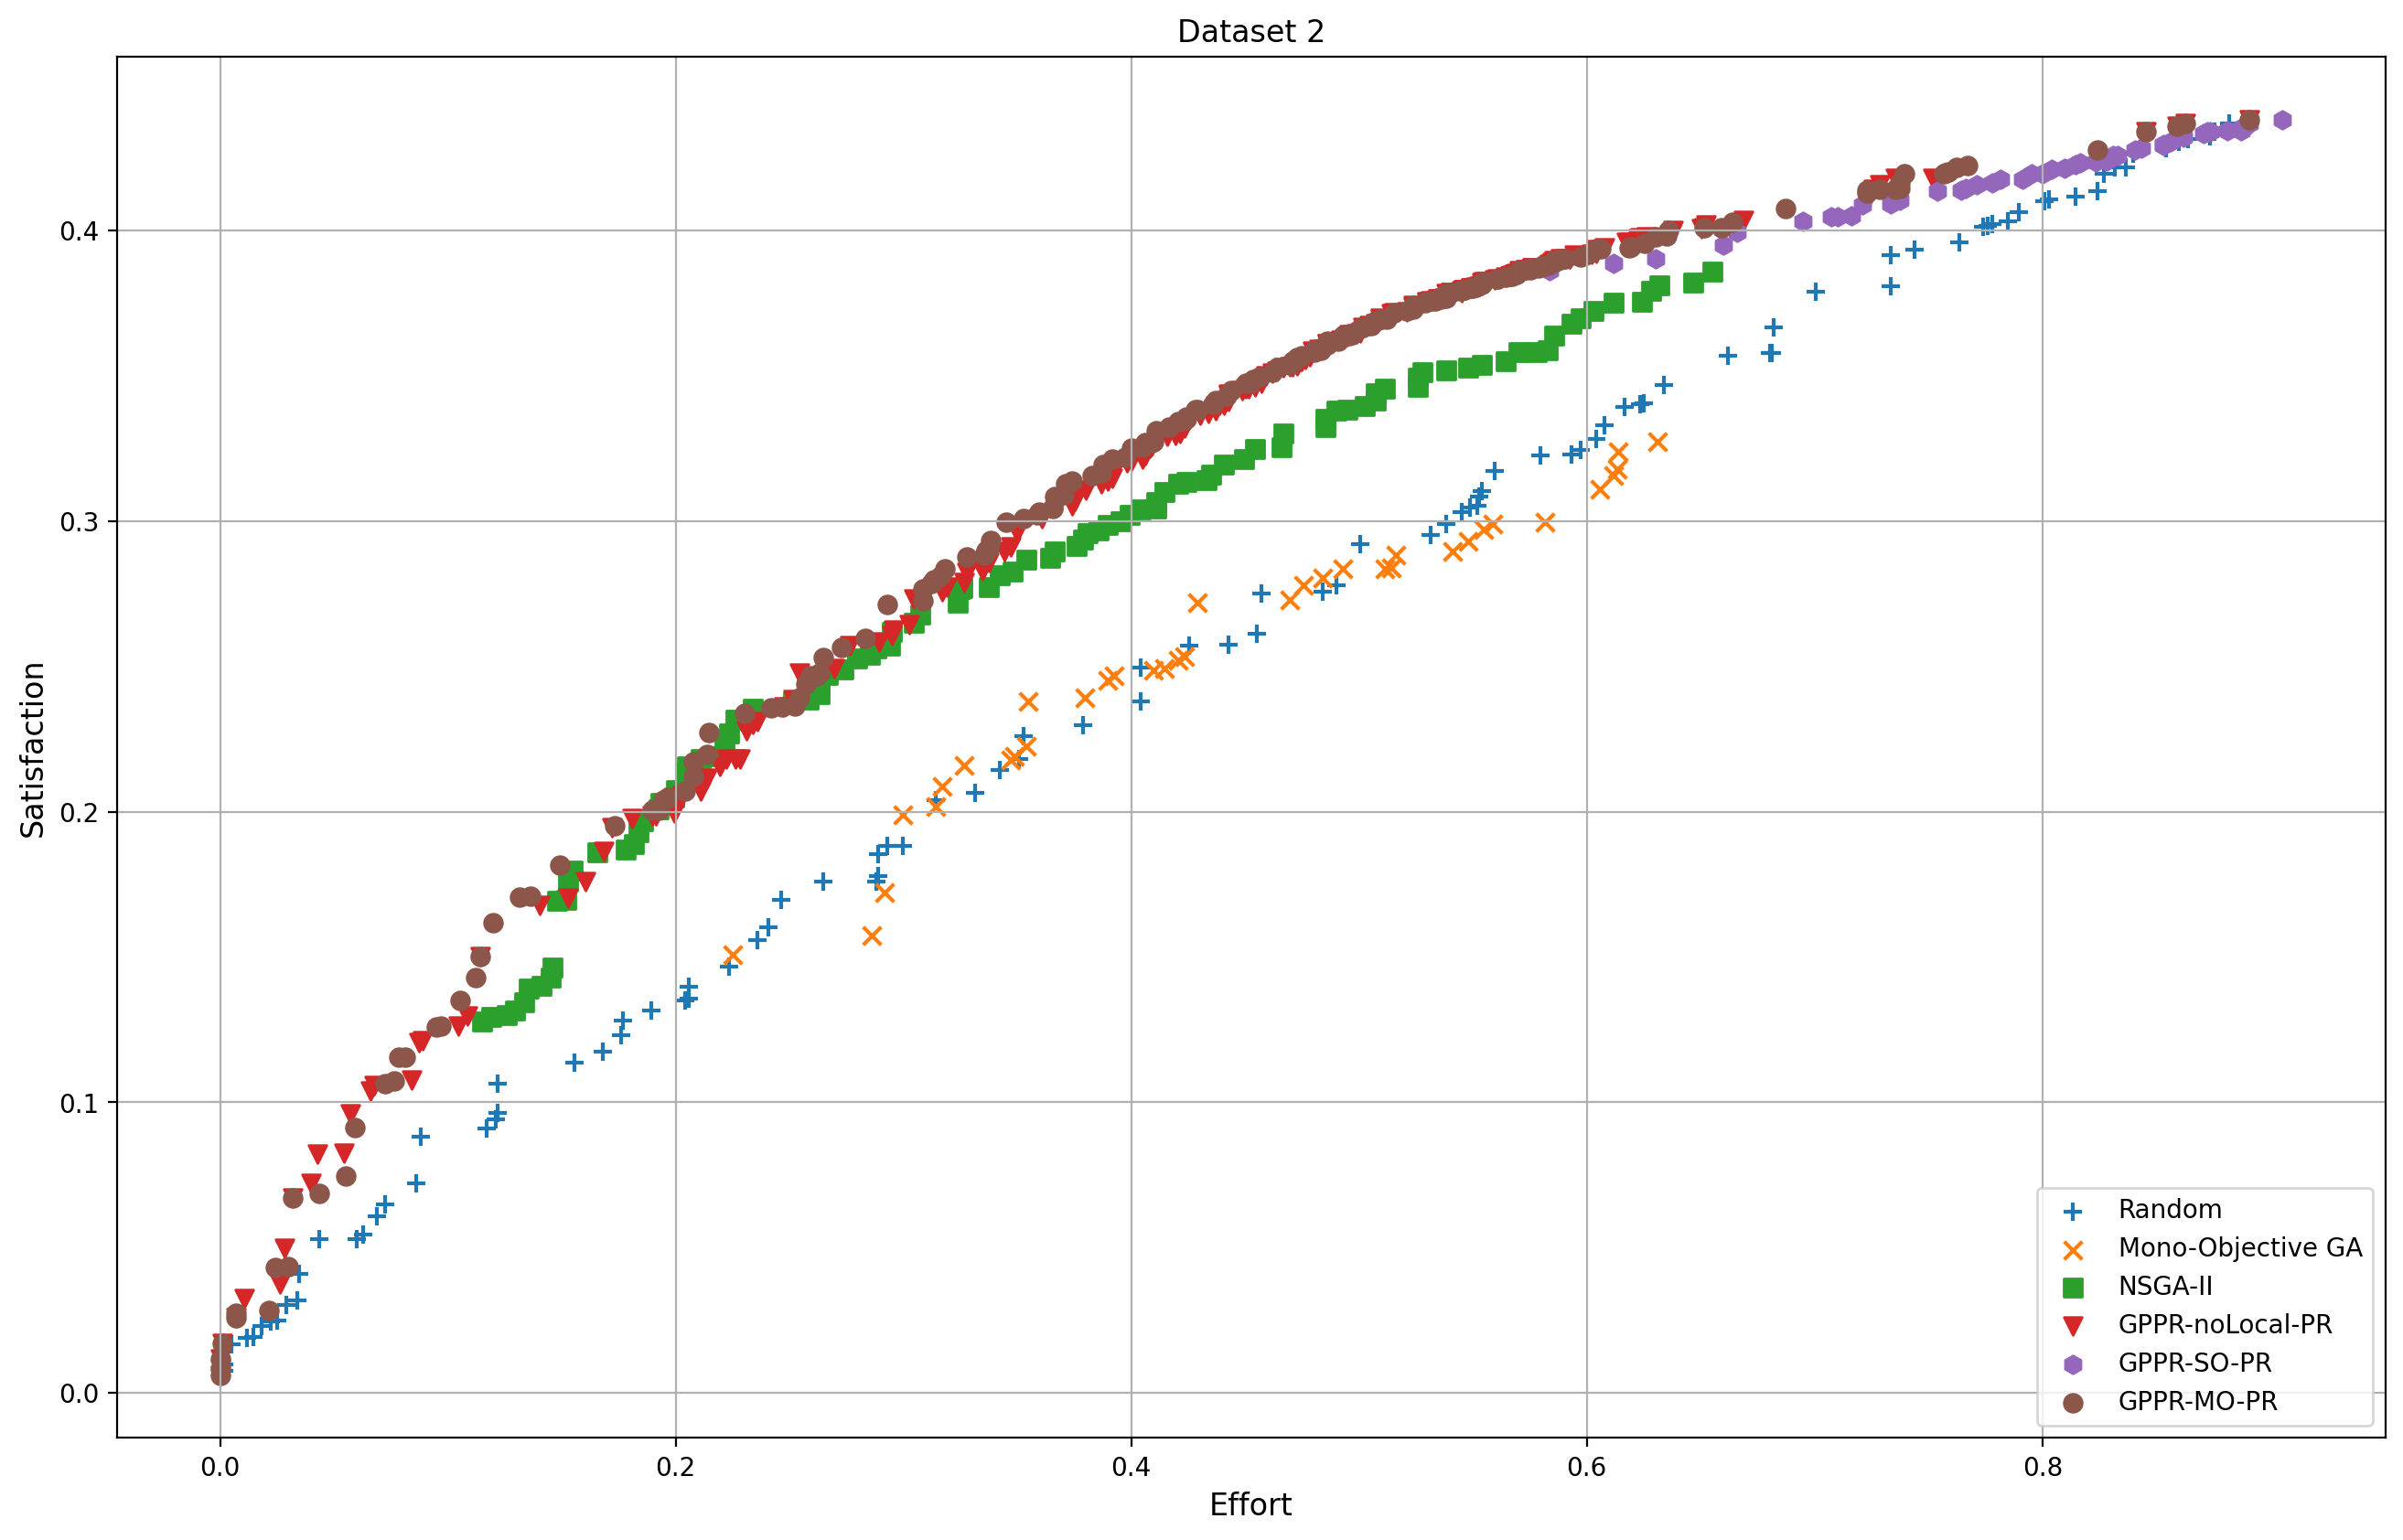

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm

sizes=[30,25,20,15,10,7,5]
markers=["+","x","s","v","h","o"]
labels=["Random","Mono-Objective GA","NSGA-II","GPPR-noLocal-PR","GPPR-SO-PR","GPPR-MO-PR"]
dataset="2"
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="None"),
    GeneticNDSAlgorithm(dataset_name=dataset,random_seed=seed,population_length=100,max_generations=100,crossover_prob=0.8,
						   crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=gens_genetic
            ,crossover_prob=0.6,crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="None",
          path_relinking_mode="after_local"),
    GRASP(dataset=dataset,iterations=500,solutions_per_iteration=200,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
          path_relinking_mode="after_local"),
    #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
    #       init_type="stochastically",local_search_type="best_first_neighbor_sorted_domination",
    #      path_relinking_mode="after_local"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_random_domination",
          path_relinking_mode="after_local"),
]

for i in range(len(algorithms)):   
    if "GRASP" in algorithms[i].file:
        file = "../output/output/pareto-grasp-"+algorithms[i].file
    else:
        file = "../output/output/pareto-genetic-"+algorithms[i].file
    data = np.loadtxt(file,delimiter=',', dtype=float)
    x,y=data.T
    plt.scatter(x,y,label=labels[i],s=50,marker=markers[i])


#file = "output/backtracking.txt"
#data = np.loadtxt(file,delimiter=',', dtype=float)
#x,y=data.T
#plt.scatter(x,y,label="optimo",s=10)
plt.title(dataset)
plt.xlabel('Effort', fontsize=12)
plt.ylabel('Satisfaction', fontsize=12)
plt.legend(loc="lower right")
plt.title("Dataset "+dataset)
plt.grid(True)
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.show()

In [ ]:
types=["grasp","genetic","genetic","grasp","grasp","grasp"]
for i in range(len(algorithms)):
    display(findData(algorithms[i],types[i]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm

sizes=[30,25,20,15,10,7,5]
markers=["o","s","v","h","+","x"]
labels=["Random","GPPR-Uniform-noLocal-PR","GPPR-Uniform-MO-PR","GPPR-Stochastic-SO","GPPR-Stochastic-MO-PR"]
dataset="s2"
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="after_local"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="best_first_neighbor_sorted_domination",
          path_relinking_mode="after_local"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_sorted_score",
          path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_random_domination",
          path_relinking_mode="after_local"),
]

for i in range(len(algorithms)):   
    if "GRASP" in algorithms[i].file:
        file = "../output/output/pareto-grasp-"+algorithms[i].file
    else:
        file = "../output/output/pareto-genetic-"+algorithms[i].file
    data = np.loadtxt(file,delimiter=',', dtype=float)
    x,y=data.T
    plt.scatter(x,y,label=labels[i],s=50,marker=markers[i])


#file = "output/backtracking.txt"
#data = np.loadtxt(file,delimiter=',', dtype=float)
#x,y=data.T
#plt.scatter(x,y,label="optimo",s=10)
plt.title(dataset)
plt.xlabel('Effort', fontsize=12)
plt.ylabel('Satisfaction', fontsize=12)
plt.legend(loc="lower right")
plt.title("Dataset "+dataset)
plt.grid(True)
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.show()

In [9]:
from sklearn import preprocessing
from scipy.stats import ranksums
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
import math
class AlgorithmDataGenetic():
    def __init__(self,a,rs,d,p,g,ss,sc,cs,cp,ms,mp):
        self.a=a
        self.rs=rs
        self.d=d
        self.p=p
        self.g=g
        self.ss=ss
        self.sc=sc
        self.cs=cs
        self.cp=cp
        self.ms=ms
        self.mp=mp
    
    def findConfigurationData(self,df):
        return df[(df["Population Length"]==self.p)&(df["Generations"]==self.g)
                     &(df["Selection Scheme"]==self.ss)&(df["Selection Candidates"]==self.sc)
                     &(df["Crossover Scheme"]==self.cs)&(df["Crossover Probability"]==self.cp)
                     &(df["Mutation Scheme"]==self.ms)&(df["Mutation Probability"]==self.mp)
              &(df["Algorithm"]==self.a)&(df["Replacement Scheme"]==self.rs)
              &(df["Dataset"]==self.d)
             ]
        
class AlgorithmDataGrasp():
    def __init__(self,a,d,it,so,ini,ls,pr):
        self.a=a
        self.it=it
        self.so=so
        self.ls=ls
        self.d=d
        self.ini=ini
        self.pr=pr
        
    def findConfigurationData(self,df):
        return df[(df["Iterations"]==self.it)&(df["Solutions per Iteration"]==self.so)
              &(df["Local Search Type"]==self.ls)&(df["Initialization Type"]==self.ini)
              &(df["Algorithm"]==self.a)&(df["Dataset"]==self.d)&(df["Path Relinking"]==self.pr)
             ]
    
dat="1"
algs = [
AlgorithmDataGenetic("GeneticNDSAlgorithm",'elitism',dat,100,100,"tournament",2,"onepoint",0.8,"flip1bit",1.0),
AlgorithmDataGenetic("NSGAIIAlgorithm",'elitism',dat,100,100,"tournament",2,"onepoint",0.6,"flip1bit",1.0),
#AlgorithmDataGrasp("GRASP",dat,100,100,"stochastically","None","after_local"),
AlgorithmDataGrasp("GRASP",dat,100,100,"stochastically","best_first_neighbor_random_domination","after_local"),
#AlgorithmDataGrasp("GRASP",dat,100,100,"stochastically","best_first_neighbor_sorted_domination","after_local"),
]

cols=["HV","Spread","Spacing","NumSolutions","Time(s)"]
maxmin=[1,-1,1,1,-1]

for j in range(len(cols)): 
    print(cols[j])
    results=list()
    best_avg=0
    best_avgn=10**9
    best_alg_index=None
    for i in range(len(algs)):
        avg=np.mean((algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values)
        results.append("{:.3f}".format(avg))
        if maxmin[j]>0 and avg>best_avg:
            best_avg=avg
            best_alg_index=i
        elif maxmin[j]<0 and avg<best_avgn:
            best_avgn=avg
            best_alg_index=i

    p_best=True
    p_list=[]
    for i in range(len(algs)):
        if i!=best_alg_index:
            dataA=(algs[best_alg_index].findConfigurationData(df_alg)[cols])[cols[j]].values
            dataB=(algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values
            _, p = ranksums(dataA, dataB)
            print("p:",p)
            if p>=0.05:
                #print(dataA)
                #print(dataB)
                p_best=False
            else:
                p_list.append(i)

    if p_best:
        mark = '*'
    else:
        mark = ''
    for index in p_list:
        results[index]=results[index]+'-'
    #results[best_alg_index]=results[best_alg_index]+mark
    results.insert(0,cols[j])
    print(results)
    

HV
p: 0.00015705228423075119
p: 0.00023856345402870988
['HV', '0.594-', '1.000', '0.909-']
Spread
p: 0.00015705228423075119
p: 0.12081938653567083
['Spread', '0.615', '0.963-', '0.648']
Spacing
p: 0.00015705228423075119
p: 0.0006051722625380393
['Spacing', '0.323-', '0.382', '0.371-']
NumSolutions
p: 0.00023856345402870988
p: 0.00023856345402870988
['NumSolutions', '26.400-', '56.000-', '64.333']
Time(s)
p: 0.00015705228423075119
p: 0.7439714780750569
['Time(s)', '17.967', '180.991-', '18.102']


In [ ]:
display(findData("genetic"))

In [ ]:
from algorithms.backtracking_algorithm.backtracking_algorithm import BacktrackingAlgorithm
alg = BacktrackingAlgorithm(dataset="1")
alg.run()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
file = "algorithms/backtracking_algorithm/backtracking.txt"
data = np.loadtxt(file,delimiter=',', dtype=float)
x,y=data.T
plt.scatter(x,y)
plt.show()

In [ ]:
import numpy as np

a = np.array([[1,2,3], [2,2,3], [3,2,3]])
index = [0]

new_a = np.delete(a, index,axis=0)

print(new_a) #Prints `[1, 2, 5, 6, 8, 9]`

In [ ]:
df_a = df_alg[(df_alg["Algorithm"]=="NSGAIIAlgorithm")&(df_alg["Dataset"]=="2")&(df_alg["Replacement Scheme"]=="elitism")&(df_alg["Population Length"]==200)]
display(df_a)

In [ ]:
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.GRASP.GRASP import GRASP
import matplotlib.pyplot as plt
import pandas as pd
# crear seed random------------------------------------------------------------------
seed=54

# iniciar------------------------------------------------------------------
print("Running...")

algorithm=GRASP(dataset="2",seed=seed,iterations=300,solutions_per_iteration=500,init_type="stochastically",
                local_search_type="None")
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function1 = [i[0].value for i in func]
function2 = [i[1].value for i in func]

algorithm=GRASP(dataset="2",seed=seed,iterations=300,solutions_per_iteration=500,init_type="stochastically",
                local_search_type="None",path_relinking_mode="after_local")
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function3 = [i[0].value for i in func]
function4 = [i[1].value for i in func]

plt.xlabel('Coste', fontsize=12)
plt.ylabel('Satisfacción', fontsize=12)
plt.scatter(function2, function1, marker='o',label="GRASP-",c="#3cb371")
plt.scatter(function4, function3, marker='x',label="GRASP-PR",c="#000000")
plt.legend(loc="upper left")
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('plots/dataset2_pareto.svg', dpi=100)

In [ ]:
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm
from algorithms.GRASP.GRASP import GRASP
from datasets.dataset1 import generate_dataset1_genes
from datasets.dataset2 import generate_dataset2_genes

from models.problem import Problem
import matplotlib.pyplot as plt
import pandas as pd
# crear seed random------------------------------------------------------------------
seed=54

# iniciar------------------------------------------------------------------
print("Running...")

algorithm=GRASP(dataset="s3",iterations=300,solutions_per_iteration=100,
        init_type="stochastically",local_search_type="None",path_relinking_mode="after_local")
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function1 = [i[0].value for i in func]
function2 = [i[1].value for i in func]

#for i in func:
#    print(i[0].value,i[1].value)
    
algorithm=UMDAAlgorithm(dataset_name="s3",random_seed=seed,population_length=200,
                        max_generations=300,selected_individuals=120)
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function3 = [i[0].value for i in func]
function4 = [i[1].value for i in func]

algorithm=PBILAlgorithm(dataset_name="s3",random_seed=seed,population_length=200,
            max_generations=300,learning_rate=0.1, mutation_prob=0.1, mutation_shift=0.1)
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function5 = [i[0].value for i in func]
function6 = [i[1].value for i in func]

plt.xlabel('Coste', fontsize=12)
plt.ylabel('Satisfacción', fontsize=12)
plt.scatter(function2, function1, marker='o',label="GRASP",c="#3cb371")
plt.scatter(function4, function3, marker='x',label="UMDA",c="#000000")
plt.scatter(function6, function5, marker='+',label="PBIL",c="#cdcdcd")
plt.legend(loc="upper left")
fig1 = plt.gcf()
plt.show()
plt.draw()